<a href="https://colab.research.google.com/github/akriti-sharmajk/mini-project/blob/main/miniproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

rose1.jpg


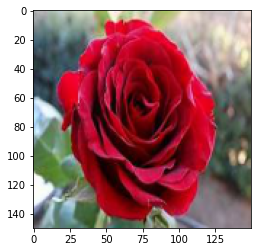

rose2.jpg


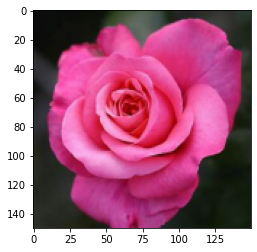

rose3.jpg


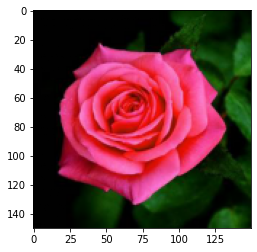

rose4.jpg


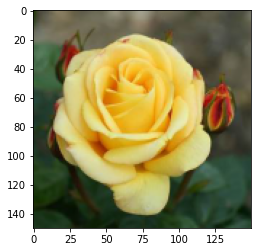

rose5.jpg


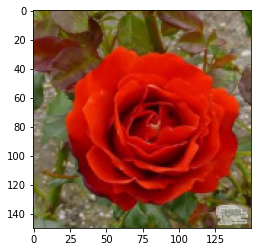

rose6.jpg


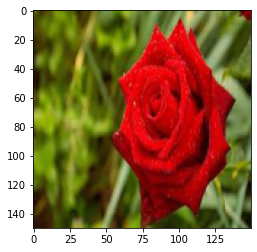

rose7.jpg


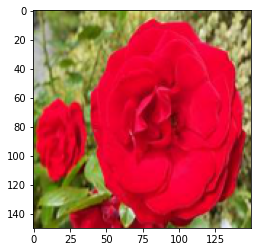

rose8.jpg


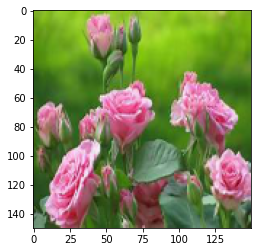

rose9.jpg


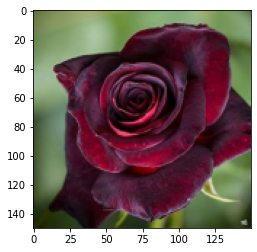

rose10.jpg


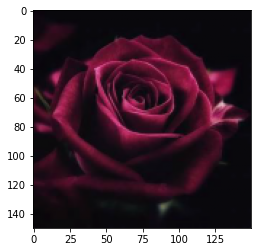

salman1.jpg


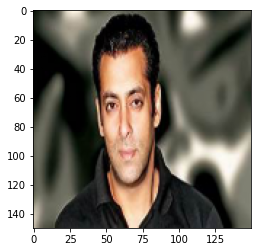

salman2.jpg


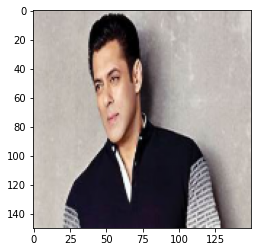

salman3.jpg


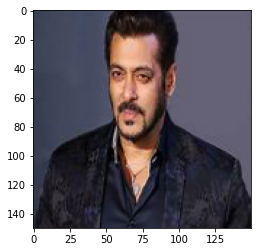

salman4.jpg


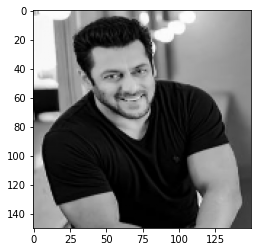

salman5.jpg


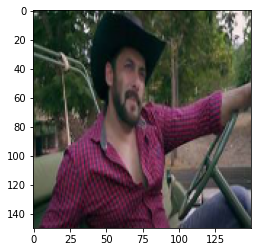

salman6.jpg


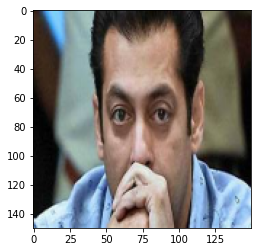

salman7.jpg


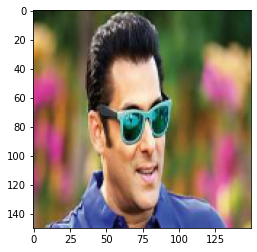

salman8.jpg


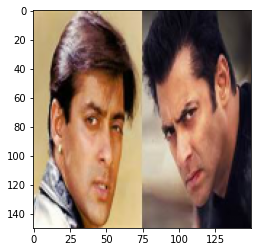

salman9.jpg


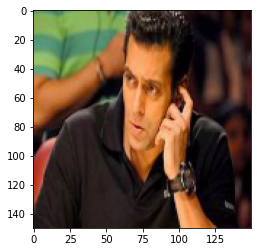

salman10.jpg


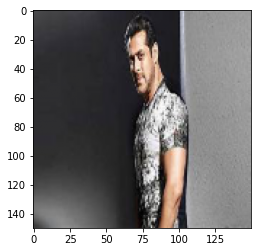

In [1]:
#minor project to comapre the images of rose and salman khan 
#step 1 
#preprocessing 


import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
flat_data = []

datadir = '/content/drive/MyDrive/miniproject/images'
categories = ['rose','salman']
for i in categories:
  path = os.path.join(datadir,i)
  #print(path)
  for img in os.listdir(path):
    print(img)
    img_array = imread(os.path.join(path,img))

    img_resize = resize(img_array,(150,150,3)) 
    flat_data.append(np.ndarray.flatten(img_resize))
    target.append(i)
    plt.imshow(img_resize)
    plt.show()

flat_data = np.array(flat_data)
target = np.array(target)

In [2]:
import pandas as pd
df = pd.DataFrame(flat_data)
df['target'] = target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,target
0,0.702288,0.708954,0.714053,0.708301,0.712222,0.723321,0.724127,0.728049,0.735892,0.733079,0.733144,0.740987,0.723242,0.723242,0.731085,0.722279,0.721832,0.729676,0.734343,0.727770,0.738293,0.731667,0.723824,0.735588,0.731641,0.723798,0.735563,0.762936,0.746000,0.761560,0.701448,0.760094,0.734617,0.691590,0.756449,0.717015,0.689974,0.757051,0.713169,0.696177,...,0.552112,0.501132,0.540431,0.562405,0.511425,0.550641,0.564431,0.513456,0.552667,0.562069,0.511124,0.552667,0.555961,0.505683,0.544196,0.552690,0.502735,0.540925,0.553971,0.510800,0.542235,0.560133,0.516926,0.548298,0.568353,0.521203,0.550852,0.568354,0.517464,0.544758,0.570679,0.515123,0.536327,0.560510,0.501098,0.520692,0.560575,0.497765,0.514471,rose
1,0.043137,0.047059,0.043137,0.043137,0.047059,0.043137,0.043137,0.047059,0.043137,0.043137,0.047059,0.043137,0.043137,0.047059,0.043137,0.043137,0.047059,0.043137,0.043137,0.047059,0.043137,0.043137,0.050980,0.043137,0.043137,0.054902,0.043137,0.043137,0.058824,0.043137,0.043137,0.058824,0.043137,0.043137,0.058824,0.043137,0.043137,0.058824,0.043137,0.043137,...,0.086275,0.129412,0.074510,0.086275,0.129412,0.074510,0.086275,0.129412,0.074510,0.086275,0.129412,0.074510,0.086275,0.129412,0.074510,0.080392,0.123529,0.068627,0.072549,0.115686,0.060784,0.070588,0.113725,0.058824,0.070588,0.113725,0.058824,0.068627,0.109804,0.054902,0.064706,0.105882,0.050980,0.064706,0.107843,0.052941,0.099020,0.142157,0.087255,rose
2,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.139216,0.398039,0.081373,0.150000,0.400980,0.066667,0.117647,0.365686,0.023529,0.100000,0.328431,0.004902,0.079412,0.295098,0.006863,0.068627,0.266667,0.019608,0.043137,0.234314,0.018627,0.036275,0.201961,0.021569,0.025490,0.179412,0.011765,0.011765,0.151961,0.001961,0.007843,0.128431,0.000980,0.012745,0.108824,0.006863,0.043137,0.120588,0.041176,rose
3,0.147059,0.221569,0.037255,0.174510,0.237255,0.074510,0.229412,0.256863,0.137255,0.272549,0.275490,0.197059,0.309804,0.296078,0.241176,0.316667,0.301961,0.255882,0.320588,0.312745,0.265686,0.324510,0.323529,0.272549,0.342157,0.337255,0.284314,0.364706,0.355882,0.298039,0.386275,0.374510,0.306863,0.422549,0.403922,0.327451,0.450980,0.430392,0.348039,0.474510,...,0.220588,0.353922,0.259804,0.216667,0.346078,0.261765,0.218627,0.348039,0.269608,0.220588,0.349020,0.276471,0.220588,0.347059,0.282353,0.213725,0.339216,0.280392,0.205882,0.329412,0.270588,0.200000,0.319608,0.252941,0.194118,0.315686,0.245098,0.180392,0.305882,0.227451,0.166667,0.292157,0.207843,0.162745,0.288235,0.198039,0.168627,0.294118,0.201961,rose
4,0.613725,0.649020,0.476471,0.575490,0.595098,0.364706,0.562745,0.562745,0.242157,0.528431,0.506863,0.096078,0.486275,0.452941,0.005882,0.464706,0.431373,0.000000,0.460784,0.432353,0.000000,0.482353,0.460784,0.020588,0.478431,0.489216,0.037255,0.489216,0.495098,0.005882,0.486275,0.467647,0.002941,0.502941,0.445098,0.108824,0.515686,0.420588,0.306863,0.567647,...,0.404902,0.374510,0.192157,0.402941,0.374510,0.192157,0.430392,0.406863,0.223529,0.495098,0.481373,0.294118,0.499020,0.491176,0.301961,0.473529,0.467647,0.279412,0.360784,0.352941,0.163725,0.342157,0.272549,0.086275,0.417647,0.335294,0.148039,0.383333,0.284314,0.104902,0.386275,0.272549,0.109804,0.426471,0.310784,0.169608,0.511765,0.402941,0.288235,rose
5,0.403608,0.425185,0.046815,0.378

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size = 0.3,random_state=101)

In [4]:
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]

from sklearn.model_selection import GridSearchCV
from sklearn import svm
svc = svm.SVC(probability=True)
clf =  GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [5]:
y_pred = clf.predict(x_test)
y_pred

array(['salman', 'salman', 'salman', 'salman', 'salman', 'salman'],
      dtype='<U6')

In [6]:
y_test

array(['rose', 'rose', 'rose', 'rose', 'salman', 'salman'], dtype='<U6')

In [7]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)


0.3333333333333333

In [8]:
confusion_matrix(y_pred,y_test)


array([[0, 0],
       [4, 2]])

In [9]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))


In [10]:
model = pickle.load(open('img_model.p','rb'))

enter ur urlhttps://im.indiatimes.in/facebook/2019/May/salman_khan_1559042681.jpg
(1680, 3200, 3)
predicted output : ['salman']


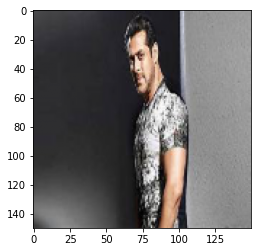

In [13]:
flat_data=[]
url = input('enter ur url')
img=imread(url)
img_resize = resize(img_array,(150,150,3)) 
flat_data.append(np.ndarray.flatten(img_resize))
print(img.shape)
plt.imshow(img_resize)
y_out = model.predict(flat_data)

print(f'predicted output : {y_out}') 

In [14]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 2.1MB/s 
     |████████████████████████████████| 174kB 46.9MB/s 
     |████████████████████████████████| 112kB 46.1MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 4.2MB 54.9MB/s 
     |████████████████████████████████| 92kB 8.2MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 122kB 42.6MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.


In [15]:
%%writefile app.py
import streamlit as st 
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.title('model to predict Rose & Salman images')
st.text('UPLOAD A IMAGE')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("choose an image...", type="jpg")
if uploaded_file is not None:
  img= Image.open(uploaded_file)
  st.image(img,caption="upload image")
  
  if st.button("PREDICT"):
    categories = ['rose','salman']
    st.write("result...")
    flat_data =[]
    img = np.array(img)
    img_resize = resize(img,(150,150,3)) 
    flat_data.append(np.ndarray.flatten(img_resize))
    print(img.shape)
    y_out = model.predict(flat_data)
    y_out = categories [0]
    st.title(f'predicted output : {y_out}') 



Writing app.py


In [16]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
print(url)


nohup: appending output to 'nohup.out'
http://4c755ad6f79b.ngrok.io
